# 異常値検知

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [177]:
df = pd.read_csv("./Dataset/chfdb_chf01_275.txt", sep='\t',names=('time','value1','value2'))

In [178]:
df

,time,value1,value2
0,275.000,-0.645,0.665
1,275.004,-0.635,0.710
2,275.008,-0.645,0.745
3,275.012,-0.635,0.760
4,275.016,-0.645,0.785
...,...,...,...
3746,289.984,-0.440,-0.070
3747,289.988,-0.445,-0.045
3748,289.992,-0.435,-0.070
3749,289.996,-0.445,-0.060


## 生データの可視化(chfdb_chf01_275)

### value1の時系列データ可視化

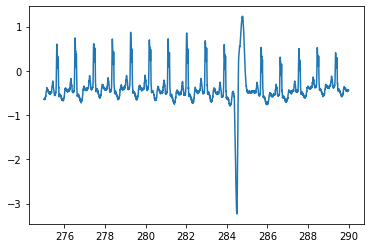

In [84]:
plt.plot(df["time"],df["value1"])

### value2の時系列データ可視化

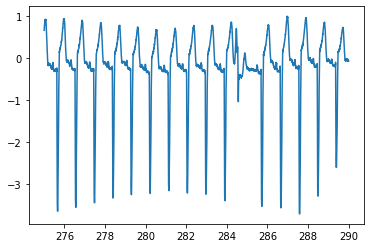

In [85]:
plt.plot(df["time"],df["value2"])

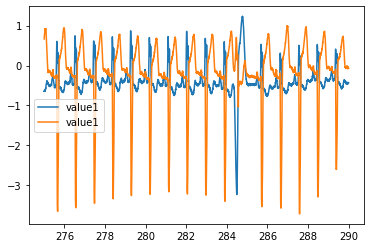

In [86]:
plt.plot(df["time"],df["value1"],label="value1")
plt.plot(df["time"],df["value2"],label="value1")
plt.legend()

## データを標準化

In [87]:
ss = StandardScaler()

In [90]:
val1 = np.array(df["value1"])
val2 = np.array(df["value2"])

In [35]:
val1 = val1.reshape(1,-1)
val2 = val2.reshape(1,-1)

In [40]:
ss_val1 = ss.fit_transform(val1)
ss_val2 = ss.fit_transform(val2)

### グラフで可視化(標準化データ)

In [53]:
ss_val1.shape

(1, 3751)

In [65]:
ss_val1[0].shape

(3751,)

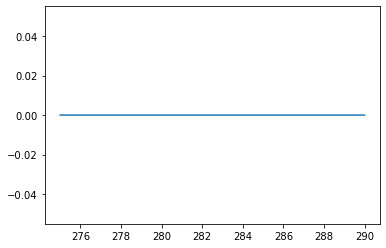

In [68]:
plt.plot(df["time"],ss_val1[0])

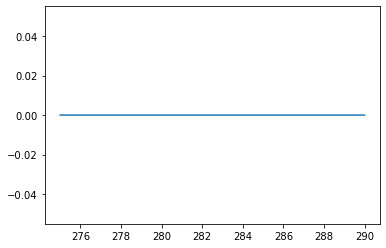

In [69]:
plt.plot(df["time"],ss_val2[0])

## 時系列データ異常検知(外れ値検知)

In [179]:
df["value1"]

0      -0.645
1      -0.635
2      -0.645
3      -0.635
4      -0.645
        ...  
3746   -0.440
3747   -0.445
3748   -0.435
3749   -0.445
3750   -0.435
Name: value1, Length: 3751, dtype: float64

In [186]:
list_1 = list(df["value1"])
list_2 = list(df["value2"])

In [183]:
def OutlierDetection(w,k,dv,data):
    outlier = []     #時系列データの絶対値の小さい値を計算した後に保存
    Absolute = []    #前時系列データの絶対値を保管
    n = 0
    count = 0
    
    for d in range(0,len(data),w):
        
        list_d = data[d:d+10]
        print("データ数:",len(list_d))
        if len(outlier) > 0:
            for j in list_d:
                Absolute.append(abs(j-0))  #原点からの距離を計算
                Absolute.sort()
        else:
            for j in list_d:
                Absolute.append(abs(j-n)) 
                Absolute.sort()
                
        print("abs:",Absolute)
        min_mean = sum(Absolute[:k])/len(Absolute[:k])
        print(min_mean)
        if min_mean > dv:
            print("異常値")
        
        outlier.append(min_mean)
        n =+ w
        Absolute = []
        count += 1

In [ ]:
def OutDetKnn():
    

### chfdb_chf01_275のdf["vaule1"]を使用する

窓を**10**に設定し、平均個数を**5**とし、闘値を**1**と設定する

In [184]:
OutlierDetection(10,5,1,list_1)

データ数: 10
abs: [0.625, 0.63, 0.63, 0.635, 0.635, 0.635, 0.645, 0.645, 0.645, 0.645]
0.6309999999999999
データ数: 10
abs: [0.565, 0.585, 0.585, 0.59, 0.595, 0.61, 0.62, 0.62, 0.62, 0.63]
0.584
データ数: 10
abs: [0.445, 0.45, 0.46, 0.46, 0.465, 0.475, 0.5, 0.53, 0.555, 0.57]
0.45599999999999996
データ数: 10
abs: [0.38, 0.38, 0.4, 0.4, 0.405, 0.415, 0.415, 0.42, 0.42, 0.43]
0.393
データ数: 10
abs: [0.415, 0.415, 0.425, 0.43, 0.435, 0.44, 0.455, 0.465, 0.47, 0.475]
0.42399999999999993
データ数: 10
abs: [0.45, 0.465, 0.465, 0.465, 0.47, 0.485, 0.49, 0.495, 0.5, 0.5]
0.4630000000000001
データ数: 10
abs: [0.49, 0.5, 0.505, 0.51, 0.51, 0.515, 0.515, 0.52, 0.52, 0.525]
0.5029999999999999
データ数: 10
abs: [0.475, 0.48, 0.485, 0.5, 0.5, 0.51, 0.515, 0.515, 0.525, 0.525]
0.488
データ数: 10
abs: [0.47, 0.475, 0.475, 0.48, 0.48, 0.485, 0.485, 0.495, 0.5, 0.505]
0.476
データ数: 10
abs: [0.34, 0.345, 0.345, 0.37, 0.395, 0.41, 0.445, 0.465, 0.475, 0.5]
0.359
データ数: 10
abs: [0.23, 0.25, 0.25, 0.26, 0.295, 0.3, 0.305, 0.315, 0.33, 0.34]
0.2

窓を**100**に設定し、平均個数を**5**とし、闘値を**1**と設定する

In [189]:
OutlierDetection(100,5,1,list_1)

データ数: 10
abs: [0.625, 0.63, 0.63, 0.635, 0.635, 0.635, 0.645, 0.645, 0.645, 0.645]
0.6309999999999999
データ数: 10
abs: [0.23, 0.25, 0.25, 0.26, 0.295, 0.3, 0.305, 0.315, 0.33, 0.34]
0.257
データ数: 10
abs: [0.555, 0.555, 0.555, 0.57, 0.57, 0.57, 0.575, 0.575, 0.59, 0.6]
0.5609999999999999
データ数: 10
abs: [0.425, 0.43, 0.435, 0.435, 0.435, 0.44, 0.44, 0.445, 0.45, 0.46]
0.43200000000000005
データ数: 10
abs: [0.205, 0.335, 0.4, 0.41, 0.415, 0.48, 0.52, 0.56, 0.56, 0.575]
0.35300000000000004
データ数: 10
abs: [0.4, 0.405, 0.405, 0.41, 0.415, 0.42, 0.42, 0.425, 0.425, 0.435]
0.4069999999999999
データ数: 10
abs: [0.085, 0.09, 0.205, 0.265, 0.285, 0.34, 0.36, 0.43, 0.53, 0.575]
0.186
データ数: 10
abs: [0.39, 0.395, 0.41, 0.42, 0.445, 0.465, 0.49, 0.505, 0.535, 0.535]
0.41200000000000003
データ数: 10
abs: [0.315, 0.345, 0.375, 0.39, 0.415, 0.425, 0.44, 0.44, 0.45, 0.46]
0.368
データ数: 10
abs: [0.575, 0.575, 0.58, 0.615, 0.615, 0.62, 0.63, 0.63, 0.63, 0.635]
0.592
データ数: 10
abs: [0.195, 0.205, 0.205, 0.235, 0.265, 0.29, 0.325

窓を**15**に設定し、平均個数を**5**とし、闘値を**1**と設定する

In [191]:
OutlierDetection(15,5,1,list_1)

データ数: 10
abs: [0.625, 0.63, 0.63, 0.635, 0.635, 0.635, 0.645, 0.645, 0.645, 0.645]
0.6309999999999999
データ数: 10
abs: [0.475, 0.5, 0.53, 0.555, 0.565, 0.57, 0.585, 0.585, 0.59, 0.595]
0.525
データ数: 10
abs: [0.38, 0.38, 0.4, 0.4, 0.405, 0.415, 0.415, 0.42, 0.42, 0.43]
0.393
データ数: 10
abs: [0.435, 0.45, 0.455, 0.465, 0.465, 0.465, 0.465, 0.47, 0.475, 0.485]
0.454
データ数: 10
abs: [0.49, 0.5, 0.505, 0.51, 0.51, 0.515, 0.515, 0.52, 0.52, 0.525]
0.5029999999999999
データ数: 10
abs: [0.475, 0.475, 0.48, 0.48, 0.485, 0.5, 0.5, 0.5, 0.505, 0.51]
0.479
データ数: 10
abs: [0.34, 0.345, 0.345, 0.37, 0.395, 0.41, 0.445, 0.465, 0.475, 0.5]
0.359
データ数: 10
abs: [0.23, 0.25, 0.26, 0.3, 0.305, 0.335, 0.34, 0.345, 0.36, 0.36]
0.269
データ数: 10
abs: [0.455, 0.475, 0.485, 0.51, 0.525, 0.53, 0.54, 0.54, 0.55, 0.56]
0.49000000000000005
データ数: 10
abs: [0.49, 0.495, 0.495, 0.495, 0.5, 0.515, 0.535, 0.535, 0.55, 0.555]
0.495
データ数: 10
abs: [0.07, 0.095, 0.31, 0.43, 0.47, 0.505, 0.55, 0.57, 0.58, 0.605]
0.275
データ数: 10
abs: [0.06, 0.

### K−近傍法を用いた機械学習

#### 練習問題

In [193]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [195]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [196]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [198]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [206]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [207]:
distances

array([[0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.        , 2.23606798],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.23606798]])

In [208]:
indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]])

### chfdb_chf01_275のdf["vaule2"]を使用する

In [187]:
OutlierDetection(10,5,1,list_2)

データ数: 10
abs: [0.665, 0.71, 0.745, 0.76, 0.785, 0.79, 0.815, 0.835, 0.86, 0.87]
0.733
データ数: 10
abs: [0.9, 0.905, 0.905, 0.91, 0.91, 0.915, 0.92, 0.92, 0.925, 0.925]
0.906
データ数: 10
abs: [0.615, 0.67, 0.695, 0.735, 0.775, 0.825, 0.87, 0.89, 0.91, 0.92]
0.698
データ数: 10
abs: [0.07, 0.115, 0.145, 0.205, 0.245, 0.315, 0.405, 0.445, 0.51, 0.565]
0.15599999999999997
データ数: 10
abs: [0.005, 0.035, 0.035, 0.065, 0.105, 0.125, 0.135, 0.155, 0.155, 0.165]
0.049
データ数: 10
abs: [0.115, 0.14, 0.145, 0.155, 0.155, 0.16, 0.16, 0.165, 0.17, 0.18]
0.14200000000000002
データ数: 10
abs: [0.135, 0.14, 0.14, 0.145, 0.15, 0.155, 0.155, 0.155, 0.16, 0.16]
0.14200000000000002
データ数: 10
abs: [0.135, 0.15, 0.155, 0.16, 0.17, 0.17, 0.175, 0.18, 0.185, 0.185]
0.15400000000000003
データ数: 10
abs: [0.185, 0.205, 0.205, 0.21, 0.21, 0.22, 0.22, 0.23, 0.24, 0.24]
0.20299999999999999
データ数: 10
abs: [0.23, 0.24, 0.245, 0.245, 0.245, 0.25, 0.25, 0.25, 0.26, 0.265]
0.24100000000000002
データ数: 10
abs: [0.12, 0.125, 0.13, 0.13, 0.135, 0.14,

In [77]:
url2 = "./Dataset/chfdb_chf13_45590.txt"
df2 = pd.read_csv(url2, sep='\t',names=('time','value1','value2'))

In [78]:
df2

,time,value1,value2
0,45590.000,-1.965,0.075
1,45590.004,-1.960,-0.130
2,45590.008,-1.830,-0.470
3,45590.012,-1.645,-0.855
4,45590.016,-1.420,-1.210
...,...,...,...
3745,45604.980,-1.230,-0.680
3746,45604.984,-1.260,-0.620
3747,45604.988,-1.230,-0.560
3748,45604.992,-1.225,-0.505


## 生データ可視化(chfdb_chf13_45590)

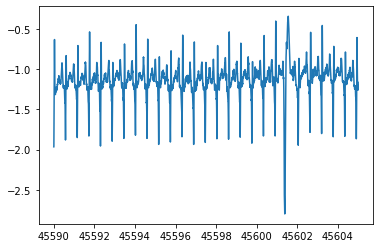

In [79]:
plt.plot(df2["time"],df2["value1"])

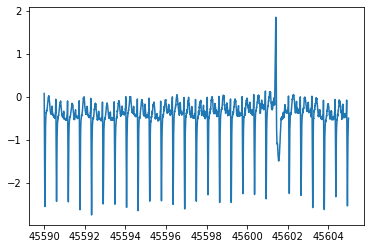

In [80]:
plt.plot(df2["time"],df2["value2"])

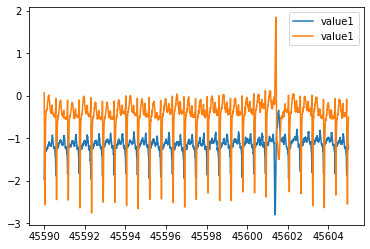

In [81]:
plt.plot(df2["time"],df2["value1"],label="value1")
plt.plot(df2["time"],df2["value2"],label="value1")
plt.legend()